<a href="https://colab.research.google.com/github/TaeWoo1/goorm/blob/main/250108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### pandas

#### pandas.DataFrame

pandas dataframe 객체는 기본적으로 아래와 같은 클래스로 생성

```
class pd.DataFrame(data = None, index = None, columns = None, copy = None)
```

**pandas.DataFrame**으로 생성된 인스턴스는 크기의 변경이 가능한 2차원 배열. (series는 1차원)  

데이터 구조에서는 레이블이 지정된 축인 행과 열까지 포함되며, 클래스 매서드를 통해 레이블의 수정이 가능

##### parameter

**data** : ndarray, Iterable, dict, DataFrame  
dict에는 Series, 배열 등등 list와 유사한 오브젝트 가능  

**index** : 인덱스 또는 배열 형태의 객체  
인스턴스에 설정되는 행 레이블. 입력하지 않으면 기본 인덱스 설정  

**columns** :  인덱스 또는 배열 형태의 객체  
인스턴스에 설정되는 열 레이블. 입력하지 않으면 기본 인덱스 설정  

**dtype** : 데이터 유형을 강제하고자 할 때 값. 기본값은 None. None일 경우 type이 자동 추론

**copy** : bool  
True일 경우 Dataframe의 원본 데이터를 수정하더라도 인스턴스가 변경되지 않지만 False일 경우 원본 데이터를 수정할 시 인스턴스의 값도 바뀌게 됨

In [2]:
import pandas as pd
import numpy as np

arr = np.random.randint(10, size = (2,2))
print(arr)


[[7 8]
 [1 8]]


In [3]:
df1 = pd.DataFrame(arr, copy = False)
df2 = pd.DataFrame(arr, copy = True)

In [4]:
arr[0,0] = 99

print(df1)
print(df2)

    0  1
0  99  8
1   1  8
   0  1
0  7  8
1  1  8


##### 클래스 예시

**예시 01. dictionary로 만들기**  

데이터 자체가 2차원 배열 형태일 경우 data만 설정해줘도 dataframe 객체 생성 가능


In [5]:
data = {'A' : [1,2], 'B' : [3,4]}
df = pd.DataFrame(data = data)
print(df)


   A  B
0  1  3
1  2  4


**예시 02. index, column 설정**  

In [6]:
data = np.array(([1,2],[3,4]))
df = pd.DataFrame(data = data, index = ['row1','row2'], columns = ['col1', 'col2'])

print(df)

      col1  col2
row1     1     2
row2     3     4


##### 덧셈(add,radd)

**DataFrame.add(other, axis='columns', level=None, fill_value=None)**  

**DataFrame.radd(other, axis='columns', level=None, fill_value=None)**  

add 함수는 DataFrame에 다른 데이터프레임, Series, scalar 등 데이터를 더하는 메서드  
단순 df + df2 등과 차이는 fill_value인수를 통해 계산 불가능 한 값을 채워 넣는 것  



> radd의 경우 순서만 바꾼 것


**기본 사용법**  
df.add(other, axis='columns', level=None, fill_value=None)  

- other : 더할 값
- axis : 더할 레이블. 0은 행, 1은 열
- level : multiindex에서 계산할 Index의 레벨
- fill_value : NaN 값 등 누락 요소를 계산전에 대체할 값

In [7]:
data = [[1,10,100], [2,20,200], [3,30,300]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data = data, index = row, columns = col)
print(df)

      col1  col2  col3
row1     1    10   100
row2     2    20   200
row3     3    30   300


**스칼라 값 더하기**  
df.add(스칼라)의 경우 df + 스칼라와 같은 결과를 가짐

In [8]:
result = df.add(1)
print(result)

      col1  col2  col3
row1     2    11   101
row2     3    21   201
row3     4    31   301


In [9]:
result = df + 1
print(result)

      col1  col2  col3
row1     2    11   101
row2     3    21   201
row3     4    31   301


**다른 DataFrame객체를 더하기**  

In [10]:
data2 = [[3],[4],[5]]
df2 = pd.DataFrame(data = data2, index = ['row1','row2','row3'], columns = ['col1'])
print(df2)

      col1
row1     3
row2     4
row3     5


In [11]:
result = df.add(df2)
print(result)

      col1  col2  col3
row1     4   NaN   NaN
row2     6   NaN   NaN
row3     8   NaN   NaN


In [12]:
result = df.add(df2, fill_value = 0)
print(result)

      col1  col2   col3
row1     4  10.0  100.0
row2     6  20.0  200.0
row3     8  30.0  300.0


##### 뺄셈(sub, rsub)

**DataFrame.sub(other, axis='columns', level=None, fill_value=None)**  

**DataFrame.rsub(other, axis='columns', level=None, fill_value=None)**  

sub 함수는 DataFrame에 다른 데이터프레임, Series, scalar 등 데이터를 빼는 메서드  
단순 df - df2 등과 차이는 fill_value인수를 통해 계산 불가능 한 값을 채워 넣는 것  



> radd의 경우 순서만 바꾼 것


**기본 사용법**  
df.sub(other, axis='columns', level=None, fill_value=None)  

- other : 뺄 값
- axis : 뺄 레이블. 0은 행, 1은 열
- level : multiindex에서 계산할 Index의 레벨
- fill_value : NaN 값 등 누락 요소를 계산전에 대체할 값

In [13]:
result = df.sub(1)
print(result)

      col1  col2  col3
row1     0     9    99
row2     1    19   199
row3     2    29   299


In [14]:
result = df - 1
print(result)

      col1  col2  col3
row1     0     9    99
row2     1    19   199
row3     2    29   299


**다른 DataFrame객체를 빼기**  

In [15]:
result = df.sub(df2)
print(result)

      col1  col2  col3
row1    -2   NaN   NaN
row2    -2   NaN   NaN
row3    -2   NaN   NaN


In [16]:
result = df.sub(df2, fill_value = 0)
print(result)

      col1  col2   col3
row1    -2  10.0  100.0
row2    -2  20.0  200.0
row3    -2  30.0  300.0


##### 곱셈(mul, rmul)

**DataFrame.mul(other, axis='columns', level=None, fill_value=None)**  

**DataFrame.rmul(other, axis='columns', level=None, fill_value=None)**  

mul 함수는 DataFrame에 다른 데이터프레임, Series, scalar 등 데이터를 곱하는 메서드  
단순 df * df2 등과 차이는 fill_value인수를 통해 계산 불가능 한 값을 채워 넣는 것  



> rmul의 경우 순서만 바꾼 것


**기본 사용법**  
df.mul(other, axis='columns', level=None, fill_value=None)  

- other : 곱할 값
- axis : 곱할 레이블. 0은 행, 1은 열
- level : multiindex에서 계산할 Index의 레벨
- fill_value : NaN 값 등 누락 요소를 계산전에 대체할 값

In [17]:
result = df.mul(2)
print(result)

      col1  col2  col3
row1     2    20   200
row2     4    40   400
row3     6    60   600


In [18]:
result = df*2
print(result)

      col1  col2  col3
row1     2    20   200
row2     4    40   400
row3     6    60   600


In [19]:
result = df.mul(df2)
print(result)

      col1  col2  col3
row1     3   NaN   NaN
row2     8   NaN   NaN
row3    15   NaN   NaN


In [20]:
result = df.mul(df2, fill_value = 0)
print(result)

      col1  col2  col3
row1     3   0.0   0.0
row2     8   0.0   0.0
row3    15   0.0   0.0


##### 나눗셈(div, rdiv)

**DataFrame.div(other, axis='columns', level=None, fill_value=None)**  

**DataFrame.rdiv(other, axis='columns', level=None, fill_value=None)**  

div 함수는 DataFrame에 다른 데이터프레임, Series, scalar 등 데이터를 나누는 메서드  
단순 df * df2 등과 차이는 fill_value인수를 통해 계산 불가능 한 값을 채워 넣는 것  



> rdiv의 경우 순서만 바꾼 것


**기본 사용법**  
df.div(other, axis='columns', level=None, fill_value=None)  

- other : 나눌 값
- axis : 나눌 레이블. 0은 행, 1은 열
- level : multiindex에서 계산할 Index의 레벨
- fill_value : NaN 값 등 누락 요소를 계산전에 대체할 값

In [21]:
result = df.div(2)
print(result)

      col1  col2   col3
row1   0.5   5.0   50.0
row2   1.0  10.0  100.0
row3   1.5  15.0  150.0


In [22]:
result = df/2
print(result)

      col1  col2   col3
row1   0.5   5.0   50.0
row2   1.0  10.0  100.0
row3   1.5  15.0  150.0


In [23]:
result = df.div(df2)
print(result)

          col1  col2  col3
row1  0.333333   NaN   NaN
row2  0.500000   NaN   NaN
row3  0.600000   NaN   NaN


In [24]:
result = df.div(df2, fill_value = 1)
print(result)

          col1  col2   col3
row1  0.333333  10.0  100.0
row2  0.500000  20.0  200.0
row3  0.600000  30.0  300.0


##### 나머지(mod,rmod)

**DataFrame.mod(other, axis='columns', level=None, fill_value=None)**  

**DataFrame.rmod(other, axis='columns', level=None, fill_value=None)**  

mod 함수는 DataFrame에 다른 데이터프레임, Series, scalar 등 데이터를 나눴을 때의 나머지를 반환하는 메서드  
단순 df % df2 등과 차이는 fill_value인수를 통해 계산 불가능 한 값을 채워 넣는 것  



> rmod의 경우 순서만 바꾼 것


**기본 사용법**  
df.mod(other, axis='columns', level=None, fill_value=None)  

- other : 나눌 값
- axis : 나눌 레이블. 0은 행, 1은 열
- level : multiindex에서 계산할 Index의 레벨
- fill_value : NaN 값 등 누락 요소를 계산전에 대체할 값

##### 거듭제곱(pow,rpow)

**DataFrame.pow(other, axis='columns', level=None, fill_value=None)**  

**DataFrame.rpow(other, axis='columns', level=None, fill_value=None)**  

pow 함수는 DataFrame에 다른 데이터프레임, Series, scalar 등 데이터를 거듭제곱하는 메서드  
단순 df ** df2 등과 차이는 fill_value인수를 통해 계산 불가능 한 값을 채워 넣는 것  



> rpow의 경우 순서만 바꾼 것


**기본 사용법**  
df.pow(other, axis='columns', level=None, fill_value=None)  

- other : 나눌 값
- axis : 나눌 레이블. 0은 행, 1은 열
- level : multiindex에서 계산할 Index의 레벨
- fill_value : NaN 값 등 누락 요소를 계산전에 대체할 값

##### 행렬곱(dot)

**DataFrame.dot(other)**  

두 객체 간의 행렬곱을 계산  


**기본 사용법**  
df.dot(other)

- other : Series, DataFrame, 배열 등이 올 수 있음

In [25]:
col = ['col1', 'col2']
row = ['row1', 'row2']

data1 = [[1,2], [3,4]]
data2 = [[5,6], [7,8]]

df1 = pd.DataFrame(data = data1)
df2 = pd.DataFrame(data = data2)

print(df1);print('-------');print(df2)


   0  1
0  1  2
1  3  4
-------
   0  1
0  5  6
1  7  8


In [26]:
df3 = df1.dot(df2)
print(df3)

    0   1
0  19  22
1  43  50


##### 반올림(round)

**DataFrame.round(decimals = 0, args, kwargs)**  

round 함수는 DataFrame 객체 내 요소를 반올림하는 메서드



**기본 사용법**  
df.round(decimals = 0, args, kwargs)

- decimals : 소수 n번째 자리까지 반올림. 음수면 10의 n승 자리까지 반올림

In [27]:
import numpy as np
from numpy import random

col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']

data = np.random.rand(3,3)*100

df = pd.DataFrame(data = data, index = row, columns = col)
print(df)

           col1       col2       col3
row1  27.583029  51.420510  54.279731
row2  74.020078  62.316059   6.292921
row3   0.834520  66.389481  85.790525


**decimal = 0인 경우**  
0은 기본적으로 일의 자리까지 반올림

In [28]:
print(df.round(0))

      col1  col2  col3
row1  28.0  51.0  54.0
row2  74.0  62.0   6.0
row3   1.0  66.0  86.0


In [29]:
print(df.round(1))

      col1  col2  col3
row1  27.6  51.4  54.3
row2  74.0  62.3   6.3
row3   0.8  66.4  85.8


In [30]:
print(df.round(2))

       col1   col2   col3
row1  27.58  51.42  54.28
row2  74.02  62.32   6.29
row3   0.83  66.39  85.79


In [31]:
print(df.round(-1))

      col1  col2  col3
row1  30.0  50.0  50.0
row2  70.0  60.0  10.0
row3   0.0  70.0  90.0


##### 합계 (sum)

**DataFrame.sum(axis = None, skipna = None, level = None, numeric_only = None, min_count = 0, kwargs)**  

sum 메서드는 객체의 행이나 열의 총 합계를 구하는 메서드



**기본 사용법**  
df.sum(axis = None, skipna = None, level = None, numeric_only = None, min_count = 0, kwargs)

- axis : 더할 레이블. 0은 행, 1은 열
- skipna : Na가 존재할 경우 무시할지의 여부. default = True
- level : multiindex에서 계산할 Index의 레벨
- numeric_only : 숫자 데이터만 사용할지 여부
- min_count : 계산에 필요한 숫자의 최소 갯수

In [32]:
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']

data = [[1,2,3],[4,5,6],[7, np.nan, 9]] # np.nan은 기본적으로 float

df = pd.DataFrame(data = data, index = row, columns = col)
print(df)

      col1  col2  col3
row1     1   2.0     3
row2     4   5.0     6
row3     7   NaN     9


**axis를 설정하여 더하기 수행**  
0은 열의 요소들의 합, 1은 행의 요소들의 합

In [33]:
print(df.sum(axis = 0))
print('-'*20)
print(df.sum(axis = 1))

col1    12.0
col2     7.0
col3    18.0
dtype: float64
--------------------
row1     6.0
row2    15.0
row3    16.0
dtype: float64


**skipna를 변경하여 계산하기**  
위 계산에서는 NaN을 무시하고 계산  
skipna = False일 경우 NaN이 포함되는 경우에는 NaN

In [34]:
print(df.sum(axis = 0, skipna = False))

col1    12.0
col2     NaN
col3    18.0
dtype: float64


**min_count를 변경하여 계산하기**
min_count는 계산에 필요한 숫자의 최소 갯수를 의미  

즉, min_count = 3이라면 NaN을 포함하는 행의 경우 숫자가 2개이기 때문에 skipna = True임에도 Nan을 출력


In [35]:
print(df.sum(axis =1, min_count  = 3))

row1     6.0
row2    15.0
row3     NaN
dtype: float64


##### 곱(prod, product)

**DataFrame.prod(axis = None, skipna = None, level=None, numeric_onlu=None, min_count=0, kwargs)**  

**DataFrame.product(axis = None, skipna = None, level=None, numeric_onlu=None, min_count=0, kwargs)**  

prod 메서드는 객체의 행이나 열의 곱을 구하는 메서드  
product 메서드와 동일

**기본 사용법**  
df.prod(axis = None, skipna = None, level=None, numeric_onlu=None, min_count=0, kwargs)

- axis : 곱할 레이블. 0은 행, 1은 열
- skipna : Na가 존재할 경우 무시할지의 여부. default = True
- level : multiindex에서 계산할 Index의 레벨
- numeric_only : 숫자 데이터만 사용할지 여부
- min_count : 계산에 필요한 숫자의 최소 갯수

**axis를 설정하여 곱하기 수행**  
0은 열의 요소들의 곱, 1은 행의 요소들의 곱

In [36]:
print(df)

      col1  col2  col3
row1     1   2.0     3
row2     4   5.0     6
row3     7   NaN     9


In [37]:
print(df.prod(axis = 0))
print('-'*20)
print(df.prod(axis = 1))

col1     28.0
col2     10.0
col3    162.0
dtype: float64
--------------------
row1      6.0
row2    120.0
row3     63.0
dtype: float64


**skipn를 변경하여 계산하기**  
위 계산에서는 NaN을 무시하고 계산  
skipna=False일 경우 NaN이 포함되는 경우에는 NaN을 반환

In [38]:
print(df.prod(axis = 0, skipna = False))

col1     28.0
col2      NaN
col3    162.0
dtype: float64


**min_count를 변경하여 계산하기**  
min_count는 계산에 필요한 숫자의 최소 갯수  

In [39]:
print(df.prod(axis = 1, min_count = 3))

row1      6.0
row2    120.0
row3      NaN
dtype: float64


##### 절댓값 (abs)


**DataFrame.abs()**  

abs 메서드는 각 요소의 절댓값을 반환하는 메서드

**기본 사용법**  
df.abs()  

숫자의 경우 절댓값을 반환하며, 복소수의 경우 복소수의 크기가 반환  

In [40]:
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']

data = [[-1,2,-3.5],[4,-5.5,3+4j],[7, np.nan, 0]]

df = pd.DataFrame(data = data, index = row, columns = col)
print(df)

      col1  col2      col3
row1    -1   2.0 -3.5+0.0j
row2     4  -5.5  3.0+4.0j
row3     7   NaN  0.0+0.0j


**abs** 메서드 실행

In [41]:
print(df.abs())

      col1  col2  col3
row1     1   2.0   3.5
row2     4   5.5   5.0
row3     7   NaN   0.0


##### 전치(transpose, T)



**DataFrame.transpose(args, copy=False)**  
**DataFrame.T(args, copy=False)**  

transpose 메서드는 DataFrame객체를 전치하는 메서드  

**기본 사용법**  
df.transpose(args, copy = False)  

copy = 사본을 반환할지 여부. 여러 dtype으로 이루어진 경우 자동으로 True

In [42]:
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3', 'row4']

data = [['A',1,2],['B',3,4],['C',5,6], ['D',7,8]]

df = pd.DataFrame(data = data, index = row, columns = col)
print(df)

     col1  col2  col3
row1    A     1     2
row2    B     3     4
row3    C     5     6
row4    D     7     8


**transpose 메서드 실행**  
행과 열이 뒤바뀌며 전치가 실행

In [43]:
print(df.transpose())

     row1 row2 row3 row4
col1    A    B    C    D
col2    1    3    5    7
col3    2    4    6    8


##### 순위(rank)

DataFrame.rank(axis = 0, method = 'average', numeric_only = None, na_option = 'keep', ascending = True, pct = False)  

rank 메서드는 축에 대해서 순위를 매기는 메서드. 동률일 경우 평균 반환

**기본 사용법**  
DataFrame.rank(axis = 0, method = 'average', numeric_only = None, na_option = 'keep', ascending = True, pct = False)

- axis : 순위를 매길 레이블. 0은 행, 1은 열
- method : {'average','min','min','first','dense'} 동순위일 때 처리 방법
- numeric_only : 숫자만 순위를 매길지 여부
- na_option : {'keep','top','bottom'} NaN 값의 처리 방법  
keep의 경우 NaN순위 할당, top의 경우 낮은 순위 할당, bottom의 경우 높은 순위 할당
- ascending : 오름차순 여부
- pct : 순위를 백분위수 형식으로 할지 여부

In [44]:
data = [[5],[5],[pd.NA],[3],[-3.1],[5],[0.4],[6.7],[3]]
row = ['A★', 'B★','C','D☆','E','F★','G','H','I☆']
df = pd.DataFrame(data=data, index=row, columns = ['Value'])
print(df)

   Value
A★     5
B★     5
C   <NA>
D☆     3
E   -3.1
F★     5
G    0.4
H    6.7
I☆     3


**method에 따른 차이**  
method에 따라 동점의 경우 순위가 어떻게 매겨지는지 확인  

- average : D와 I의 경우 3,4등이니 3.5
- min : A,B,F의 경우 각각 5,6,7등으로 가장 낮은 등수인 5출력
- max : A,B,F의 경우 각각 5,6,7등으로 가장 높은 등수인 7출력
- first : 동점일 경우 위에서부터 매김
- dense : min처럼 동작하지만 등수가 순차적으로 증가

In [45]:
df['average'] = df['Value'].rank(method = 'average')
df['min'] = df['Value'].rank(method = 'min')
df['max'] = df['Value'].rank(method = 'max')
df['first'] = df['Value'].rank(method = 'first')
df['dense'] = df['Value'].rank(method = 'dense')
print(df)

   Value  average  min  max  first  dense
A★     5      6.0  5.0  7.0    5.0    4.0
B★     5      6.0  5.0  7.0    6.0    4.0
C   <NA>      NaN  NaN  NaN    NaN    NaN
D☆     3      3.5  3.0  4.0    3.0    3.0
E   -3.1      1.0  1.0  1.0    1.0    1.0
F★     5      6.0  5.0  7.0    7.0    4.0
G    0.4      2.0  2.0  2.0    2.0    2.0
H    6.7      8.0  8.0  8.0    8.0    5.0
I☆     3      3.5  3.0  4.0    4.0    3.0


**na_option에 따른 차이**  
na_option에 따라 Na가 포함된 경우 순위가 어떻게 매겨지는지 확인할 수 있음.  
pct도 추가  

- keep : Na요소에 NaN를 부여하여 그대로 둠
- top : Na에게 가장 높은 순위를 부여.
- bottom : Na에게 가장 낮은 순위를 부여.
- pct : True인 경우 백분위수로 표시

In [46]:
df = pd.DataFrame(data=data, index=row, columns = ['Value'])

In [47]:
df['keep'] = df['Value'].rank(na_option = 'keep')
df['top'] = df['Value'].rank(na_option = 'top')
df['bottom'] = df['Value'].rank(na_option = 'bottom')
df['pct'] = df['Value'].rank(pct = True)
print(df)

   Value  keep  top  bottom     pct
A★     5   6.0  7.0     6.0  0.7500
B★     5   6.0  7.0     6.0  0.7500
C   <NA>   NaN  1.0     9.0     NaN
D☆     3   3.5  4.5     3.5  0.4375
E   -3.1   1.0  2.0     1.0  0.1250
F★     5   6.0  7.0     6.0  0.7500
G    0.4   2.0  3.0     2.0  0.2500
H    6.7   8.0  9.0     8.0  1.0000
I☆     3   3.5  4.5     3.5  0.4375


##### 차이[이산] (diff)

**DataFrame.diff(periods=1, axis=0)**  

diff는 한 객체 내에서 열과 열/행과 행의 차이를 출력하는 메서드

**기본 사용법**  
df.diff(periods = 1, axis = 0)  

- axis : 비교할 축 지정. 0인 경우 행끼리, 1인 경우 열끼리  
- periods : 비교할 간격 지정

In [48]:
a = [1,2,3,4,5,6,7,8]
b = [1,2,4,8,16,32,64,128]
c = [8,7,6,5,4,3,2,1]

data = {'col1' : a, 'col2' : b, 'col3' : c}

df = pd.DataFrame(data)
print(df)

   col1  col2  col3
0     1     1     8
1     2     2     7
2     3     4     6
3     4     8     5
4     5    16     4
5     6    32     3
6     7    64     2
7     8   128     1


In [49]:
print(df.diff(axis = 0))

   col1  col2  col3
0   NaN   NaN   NaN
1   1.0   1.0  -1.0
2   1.0   2.0  -1.0
3   1.0   4.0  -1.0
4   1.0   8.0  -1.0
5   1.0  16.0  -1.0
6   1.0  32.0  -1.0
7   1.0  64.0  -1.0


In [50]:
print(df.diff(axis = 1))

   col1  col2  col3
0   NaN     0     7
1   NaN     0     5
2   NaN     1     2
3   NaN     4    -3
4   NaN    11   -12
5   NaN    26   -29
6   NaN    57   -62
7   NaN   120  -127


**periods의 사용**  
기본값은 +1로 바로 이전값과의 차를 출력

In [51]:
print(df.diff(periods = 3))

   col1   col2  col3
0   NaN    NaN   NaN
1   NaN    NaN   NaN
2   NaN    NaN   NaN
3   3.0    7.0  -3.0
4   3.0   14.0  -3.0
5   3.0   28.0  -3.0
6   3.0   56.0  -3.0
7   3.0  112.0  -3.0


In [52]:
print(df.diff(periods = -2))

   col1  col2  col3
0  -2.0  -3.0   2.0
1  -2.0  -6.0   2.0
2  -2.0 -12.0   2.0
3  -2.0 -24.0   2.0
4  -2.0 -48.0   2.0
5  -2.0 -96.0   2.0
6   NaN   NaN   NaN
7   NaN   NaN   NaN


##### 차이[백분률] (pct_change)

**DataFrame.pct_change(periods=1, fill_method='pad', limit=None, freq=None, kwargs)**  

pct_change는 한 객체 내에서 행과 행의 차이를 현재값과의 백분율로 출력하는 메서드.  
즉, (다음행 - 현재행) / 현재행

**기본 사용법**  
pct_change(periods=1, fill_method='pad', limit=None, freq=None, kwargs)  

- periods : 비교할 간격
- fill_method : (ffill, bfill)
- limit : 결측값을 몇개나 대체할지 지정
- freq : 시계열 API에서 사용할 증분 지정(예 : 'M' 또는 BDay())

In [53]:
a = [1,1,4,4,1,1]
b = [1,2,4,8,16,32]
c = [1,np.nan,np.nan,np.nan,16,64]
data = {'col1' : a, 'col2' : b, 'col3' : c}
df = pd.DataFrame(data)
print(df)

   col1  col2  col3
0     1     1   1.0
1     1     2   NaN
2     4     4   NaN
3     4     8   NaN
4     1    16  16.0
5     1    32  64.0


**기본적인 사용법**  
기본적으로 (현재행 - 이전행) / 이전행

In [54]:
print(df.pct_change())

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0   0.0
2  3.00   1.0   0.0
3  0.00   1.0   0.0
4 -0.75   1.0  15.0
5  0.00   1.0   3.0


/tmp/ipython-input-422797100.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change())


**periods 인수 사용**  
periods 인수는 계산할 간격을 나타냄. 기본은 1로 +1을 의미하며 마이너스일 경우 반대방향으로 계산


In [55]:
print(df.pct_change(periods = 2))

   col1  col2  col3
0   NaN   NaN   NaN
1   NaN   NaN   NaN
2  3.00   3.0   0.0
3  3.00   3.0   0.0
4 -0.75   3.0  15.0
5 -0.75   3.0  63.0


/tmp/ipython-input-1970063114.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change(periods = 2))


In [56]:
print(df.pct_change(periods = -1))

   col1  col2    col3
0  0.00  -0.5  0.0000
1 -0.75  -0.5  0.0000
2  0.00  -0.5  0.0000
3  3.00  -0.5 -0.9375
4  0.00  -0.5 -0.7500
5   NaN   NaN     NaN


/tmp/ipython-input-3311317342.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change(periods = -1))


**fill_method / limit 인수의 사용**  

fill_method 인수는 결측치를 대체할 값을 지정할 수 있음  
fill_method='ffill'인 경우는 기본값으로 바로 윗값으로 결측 대체  
fill_method='bfill'인 경우는 바로 아랫값으로 결측 대체

In [57]:
print(df.pct_change(fill_method = 'bfill'))

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0  15.0
2  3.00   1.0   0.0
3  0.00   1.0   0.0
4 -0.75   1.0   0.0
5  0.00   1.0   3.0


/tmp/ipython-input-2085736019.py:1: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change(fill_method = 'bfill'))


In [58]:
print(df.pct_change(limit = 2))

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0   0.0
2  3.00   1.0   0.0
3  0.00   1.0   NaN
4 -0.75   1.0   NaN
5  0.00   1.0   3.0


/tmp/ipython-input-4162748040.py:1: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change(limit = 2))


##### 누적 계산(expending)

**DataFrame.expanding(min_periods=1, center=None, axis=0, method='single')**  

expanding 메서드는 행이나 열의 값에 대해 누적으로 연산을 수행하는 메서드  
df.expanding().sum()처럼 추가 메서드를 이용하여 연산을 수행

**기본 사용법**  

df.expanding(min_periods=1, center=None, axis=0, method='single').추가메서드()  

- min_periods : 연산을 수행할 요소의 최소 갯수. 이보다 작으면 NaN 출력  
- center : 미사용  
- axis : 누적 연산을 수행할 축을 지정
- method : {single/table} 연산을 한 줄씩 수행할지 전체 테이블에 대해서 롤링을 수행할 지 여부  
기본값은 single  
table을 사용하기 위해서는 numba 라이브러리, 추가 연산 메서드에서 engine=numba

In [59]:
import numba
data = {'col1':[1,2,3,4], 'col2':[3,7,5,6]}
idx = ['row1','row2','row3','row4']
df = pd.DataFrame(data = data, index = idx)
print(df)

      col1  col2
row1     1     3
row2     2     7
row3     3     5
row4     4     6


**기본적인 사용법**  
기본적으로 df.expanding().추가연산메서드 형태로 지정하면, 해당 연산을 누적으로 진행

In [60]:
print(df.expanding().sum())

      col1  col2
row1   1.0   3.0
row2   3.0  10.0
row3   6.0  15.0
row4  10.0  21.0


In [61]:
print(df.expanding(min_periods = 4).sum())

      col1  col2
row1   NaN   NaN
row2   NaN   NaN
row3   NaN   NaN
row4  10.0  21.0


In [62]:
print(df.expanding(axis = 1).sum())

      col1  col2
row1   1.0   4.0
row2   2.0   9.0
row3   3.0   8.0
row4   4.0  10.0


/tmp/ipython-input-4212697379.py:1: FutureWarning: Support for axis=1 in DataFrame.expanding is deprecated and will be removed in a future version. Use obj.T.expanding(...) instead
  print(df.expanding(axis = 1).sum())


method = 'table'로 입력할 경우 numba 라이브러리를 이용해 연산을 테이블 단위로 롤링.

In [63]:
print(df.expanding(method = 'table').sum(engine='numba'))

      col1  col2
row1   1.0   3.0
row2   3.0  10.0
row3   6.0  15.0
row4  10.0  21.0


##### 기간 이동 계산(rolling)

**DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')**  

rolling 메서드는 현재 열에 대하여 일정 크기의 창(window)를 이용하려 그 window안의 값을 추가 메서드를 통해 계산한다.

**기본 사용법**  
df.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')

- window : 계산할 창(window)의 크기. 열 기준으로 계산할 경우 행의 수.

- min_periods : 계산할 최소 크기(기간). window 안의 값의 수가 min_periods의 값보다 작을 경우 NaN 을 출력.
기본적으로 window 크기와 동일.

- center : {True / False} 레이블을 window의 중간에 둘지 여부. 기본값은 False로 레이블이 창 우측에 위치.

- win_type : {'triang' / 'gaussian' / ...} 가중치를 넣어 계산할 경우 계산 방식. 때에따라 연산 메서드에 추가 인수를 지정해야할 수도 있음.

- on : 시계열 인덱스나, 시계열과 유사한 열이 있을 경우 이 열을 기준으로 rolling 을 수행.

- axis : 계산의 기준이 될 축.

- closed : {'left' / 'right' / 'both' / 'neither'} window가 닫히는 방향.  

- method : {'single' / 'table'} numba 를 이용하여 테이블 계산을 진행하여 속도를 높일지 여부. 현재 'single'만 사용가능.

In [64]:
period = pd.period_range(start = '2022-01-13 00:00:00', end = '2022-01-13 02:30:00', freq = '30T')
data = {'col1':[1,2,3,4,5,6], 'col2':period}
idx = ['row1', 'row2', 'row3', 'row4', 'row5', 'row6']
df = pd.DataFrame(data = data, index = idx)
print(df)

      col1              col2
row1     1  2022-01-13 00:00
row2     2  2022-01-13 00:30
row3     3  2022-01-13 01:00
row4     4  2022-01-13 01:30
row5     5  2022-01-13 02:00
row6     6  2022-01-13 02:30


/tmp/ipython-input-2931636557.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  period = pd.period_range(start = '2022-01-13 00:00:00', end = '2022-01-13 02:30:00', freq = '30T')


In [65]:
print(df.rolling(window = 3).sum(numeric_only = True))

      col1
row1   NaN
row2   NaN
row3   6.0
row4   9.0
row5  12.0
row6  15.0


In [66]:
print(df.rolling(window = 3, closed = 'left').sum(numeric_only = True))

      col1
row1   NaN
row2   NaN
row3   NaN
row4   6.0
row5   9.0
row6  12.0


In [67]:
print(df.rolling(window = 3, closed = 'right').sum(numeric_only = True))


      col1
row1   NaN
row2   NaN
row3   6.0
row4   9.0
row5  12.0
row6  15.0


In [68]:
print(df.rolling(window = 3, closed = 'both').sum(numeric_only = True))


      col1
row1   NaN
row2   NaN
row3   6.0
row4  10.0
row5  14.0
row6  18.0


In [69]:
print(df.rolling(window = 3, closed = 'neither').sum(numeric_only = True))
print(df.rolling(window = 3, closed = 'neither', min_periods = 2).sum(numeric_only = True))


      col1
row1   NaN
row2   NaN
row3   NaN
row4   NaN
row5   NaN
row6   NaN
      col1
row1   NaN
row2   NaN
row3   3.0
row4   5.0
row5   7.0
row6   9.0


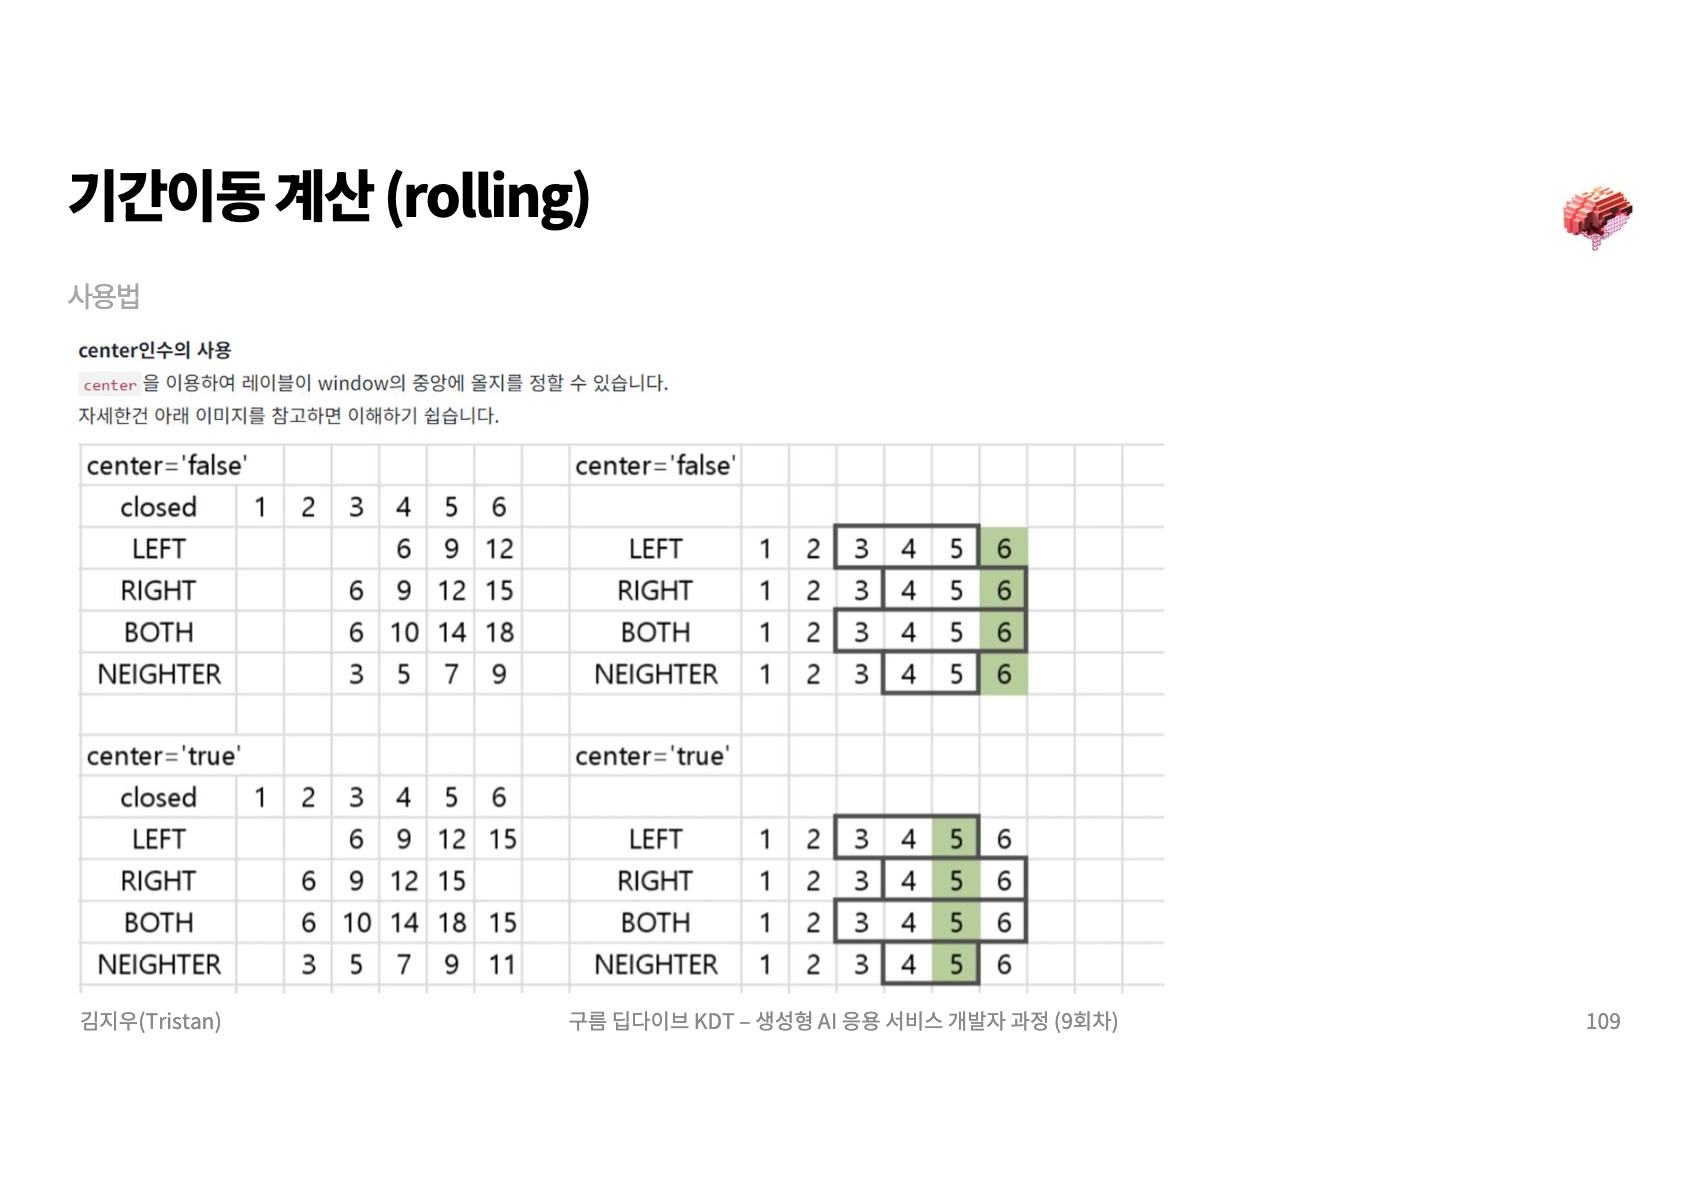

In [71]:
print(df.rolling(window = 3, center = True).sum(numeric_only = True))

      col1
row1   NaN
row2   6.0
row3   9.0
row4  12.0
row5  15.0
row6   NaN


In [72]:
print(df.rolling(window = 3, win_type = 'triang').sum(numeric_only = True))

      col1
row1   NaN
row2   NaN
row3   4.0
row4   6.0
row5   8.0
row6  10.0


In [76]:
print(df.rolling(window = 3, win_type = 'gaussian').sum(std = 3, numeric_only = True))


           col1
row1        NaN
row2        NaN
row3   5.783838
row4   8.675757
row5  11.567676
row6  14.459595


In [78]:
print(df.rolling(window = '60T', on = 'col2').sum())


      col1              col2
row1   1.0  2022-01-13 00:00
row2   3.0  2022-01-13 00:30
row3   5.0  2022-01-13 01:00
row4   7.0  2022-01-13 01:30
row5   9.0  2022-01-13 02:00
row6  11.0  2022-01-13 02:30


/tmp/ipython-input-4213875850.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  print(df.rolling(window = '60T', on = 'col2').sum())


##### 그룹화 계산 (groupby)

**DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)**  

groupby 메서드는 데이터를 그룹화하여 연산을 수행하는 메서드

**기본 사용법**  
df.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)  

- by : 그룹화할 내용. 함수, 축, 리스트 등.
- axis : 그룹화를 적용할 축.
- level : 멀티 인덱스의 경우 레벨을 지정.
- as_index : 그룹화한 내용을 인덱스로 할지 여부. False이면 기존 인덱스가 유지.
- sort : 그룹키를 정렬할지 여부.
- group_keys : apply 메서드 사용 시 결과에 따라 그룹화 대상인 열이 인덱스와 중복(group key)이 될 수 있음. 이 때,  group_keys=False로 인덱스를 기본값으로 지정.
- squeeze : 결과가 1행 or 1열짜리 데이터일 경우 Series, 1행&1열짜리 데이터일 경우 스칼라로 출력.
- observed : Categorical로 그룹화할 경우 Categorical 그룹에 의해 관찰된 값만 표시할 지 여부.
- dropna : 결측값을 계산에서 제외할지 여부.

In [80]:
idx = ['A','A','B','B','B','C','C','C','D','D','D','D','E','E','E']
col = ['col1','col2','col3']
data = np.random.randint(0,9,(15,3))
df = pd.DataFrame(data = data, index = idx, columns = col).reset_index()
print(df)

   index  col1  col2  col3
0      A     3     3     3
1      A     0     0     5
2      B     4     1     4
3      B     6     0     8
4      B     1     4     7
5      C     4     8     3
6      C     2     6     0
7      C     8     5     0
8      D     1     3     4
9      D     7     8     6
10     D     8     2     5
11     D     7     7     7
12     E     1     0     8
13     E     3     1     1
14     E     5     7     5


In [81]:
print(df.groupby('index'))

In [82]:
print(df.groupby('index').mean())

           col1      col2      col3
index                              
A      1.500000  1.500000  4.000000
B      3.666667  1.666667  6.333333
C      4.666667  6.333333  1.000000
D      5.750000  5.000000  5.500000
E      3.000000  2.666667  4.666667


In [83]:
print(df.groupby('index').count())

       col1  col2  col3
index                  
A         2     2     2
B         3     3     3
C         3     3     3
D         4     4     4
E         3     3     3


In [84]:
print(df.groupby('index').agg(['sum', 'mean']))

      col1           col2           col3          
       sum      mean  sum      mean  sum      mean
index                                             
A        3  1.500000    3  1.500000    8  4.000000
B       11  3.666667    5  1.666667   19  6.333333
C       14  4.666667   19  6.333333    3  1.000000
D       23  5.750000   20  5.000000   22  5.500000
E        9  3.000000    8  2.666667   14  4.666667


In [85]:
def top (df, n=2, col = 'col1'):
  return df.sort_values(by=col)[-n:] # 상위 n개 열을 반환하는 함수 top

print(df.groupby('index').apply(top)) # 인덱스와 index열이 중복

         index  col1  col2  col3
index                           
A     1      A     0     0     5
      0      A     3     3     3
B     2      B     4     1     4
      3      B     6     0     8
C     5      C     4     8     3
      7      C     8     5     0
D     11     D     7     7     7
      10     D     8     2     5
E     13     E     3     1     1
      14     E     5     7     5


/tmp/ipython-input-2675388079.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('index').apply(top))


In [86]:
print(df.groupby('index', group_keys = False).apply(top)) # 인덱스와 중복이 제거

   index  col1  col2  col3
1      A     0     0     5
0      A     3     3     3
2      B     4     1     4
3      B     6     0     8
5      C     4     8     3
7      C     8     5     0
11     D     7     7     7
10     D     8     2     5
13     E     3     1     1
14     E     5     7     5


/tmp/ipython-input-3538547316.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('index', group_keys = False).apply(top)) # 인덱스와 중복이 제거


Categorical 객체를 생성할 때, 그룹화할 열에 있는 값이 아닌 값을 포함하게되면, 그룹화할 때 해당 값을 표시할지 여부를 선택 가능


In [87]:
df_cat = pd.Categorical(df['index'], categories = ['A','B','C','D','E','F']) #df의 index열에 대해서 A,B,C,D,E,F로 Categorical을 하여 df_cat 생성
print(df_cat)
# 값은 A~E부터 있지만 category는 F까지 지정

['A', 'A', 'B', 'B', 'B', ..., 'D', 'D', 'E', 'E', 'E']
Length: 15
Categories (6, object): ['A', 'B', 'C', 'D', 'E', 'F']


In [88]:
print(df['col1'].groupby(df_cat).count())

A    2
B    3
C    3
D    4
E    3
F    0
Name: col1, dtype: int64


/tmp/ipython-input-1552631802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df['col1'].groupby(df_cat).count())


In [89]:
print(df['col1'].groupby(df_cat, observed = True).count())

A    2
B    3
C    3
D    4
E    3
Name: col1, dtype: int64


In [92]:
print(df.groupby(['index'], as_index=False).sum())

  index  col1  col2  col3
0     A     3     3     8
1     B    11     5    19
2     C    14    19     3
3     D    23    20    22
4     E     9     8    14


In [94]:
df.loc[6,'index'] = np.nan
print(df)

   index  col1  col2  col3
0      A     3     3     3
1      A     0     0     5
2      B     4     1     4
3      B     6     0     8
4      B     1     4     7
5      C     4     8     3
6    NaN     2     6     0
7      C     8     5     0
8      D     1     3     4
9      D     7     8     6
10     D     8     2     5
11     D     7     7     7
12     E     1     0     8
13     E     3     1     1
14     E     5     7     5


In [95]:
print(df.groupby('index').sum())

       col1  col2  col3
index                  
A         3     3     8
B        11     5    19
C        12    13     3
D        23    20    22
E         9     8    14


In [96]:
print(df.groupby('index', dropna = False).sum())


       col1  col2  col3
index                  
A         3     3     8
B        11     5    19
C        12    13     3
D        23    20    22
E         9     8    14
NaN       2     6     0


level 인수의 사용(multi index)

In [97]:
idx = [['idx1','idx1','idx2','idx2','idx2'], ['row1','row2','row1','row2','row3']]
col = ['col1','col2','col2']
data = np.random.randint(0,9,(5,3))
df = pd.DataFrame(data = data, index = idx, columns = col).rename_axis(index = ['lv0', 'lv1'])
print(df)

           col1  col2  col2
lv0  lv1                   
idx1 row1     0     1     4
     row2     7     3     1
idx2 row1     1     8     2
     row2     0     2     0
     row3     2     1     4


In [98]:
print(df.groupby(level=1).sum())

      col1  col2  col2
lv1                   
row1     1     9     6
row2     7     5     1
row3     2     1     4


In [100]:
print(df.groupby(['lv1', 'lv0']).sum())


           col1  col2  col2
lv1  lv0                   
row1 idx1     0     1     4
     idx2     1     8     2
row2 idx1     7     3     1
     idx2     0     2     0
row3 idx2     2     1     4


##### 지수가중함수(ewm)

**DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0,adjust=True, ignore_na=False, axis=0, times=None, method='single')**

ewm은 지수 가중 함수. 오래된 데이터에 지수 감쇠를 적용하여 최근 데이터가 더 큰 영향을 끼치도록 가중치를 주는 함수  

보통 추가 메서드로 mean()을 사용해서 지수가중평균으로 사용

df.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0,adjust=True, ignore_na=False, axis=0, times=None, method='single')  

> 기본적으로 가중치를 결정하는 요소는 alpha로 표기되는 평활계수(감쇠계수). com/span/halflife를 통해 자동계산하도록 하거나, alpha를 통해 직접 설정 가능

- com : 질량중심 값으로 평활계수를 계산[a = 1 / (1 + com)]

- span : 계산 기간으로 평활계수를 계산[a = 2 / (span + 1)]

- halflife : 반감기를 이용하여 평활계수를 계산[a = e^(-(ln(2) / halflife))]

- alpha : 평활계수를 직접 입력[0 < a <= 1]

- min_periods : 계산을 위한 최소 기간

- adjust : 상대적 가중치의 불균형을 해소하기 위해 조정계수로 나눌지의 여부. 대체로 값이 많을수록 adjust를 하는 것이 유리.

- ignore_na : 가중치를 계산할 때 누락값을 무시할지 여부입니다.

> [x0, None, x1] 일때,
이 경우 ignore_na = False 이면 절대위치를 기반으로 하며,
x0와 x2의 가중치는 adjust = True 인 경우: (1 - a)^2 와 1
adjust = False 인 경우: (1 - a)^2 와 a

> [x0, None, x1] 일때,
이 경우 ignore_na = False 이면 절대위치를 기반으로 하며,
x0와 x2의 가중치는 adjust = True 인 경우: (1 - a) 와 1
adjust = False 인 경우: (1 - a) 와 a

- axis : 계산을 수행할 축

- times : 관찰에 해당하는 시간. 단조증가 형태의 datetime64[ns]

- method : {single/table} 한줄씩 계산할지(기본값) 아니면 numba engine을 사용해서 table 단위로 계산할지.  
사용시 ewm(method = 'table').mean(engine='numba')처럼 추가 메서드에 engine 설정

In [101]:
data = {'val': [1,4,2,3,2,5,14,10,12,14,np.nan,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
print(df)

    index   val
0       0   1.0
1       1   4.0
2       2   2.0
3       3   3.0
4       4   2.0
5       5   5.0
6       6  14.0
7       7  10.0
8       8  12.0
9       9  14.0
10     10   NaN
11     11  16.0
12     12  12.0
13     13  20.0
14     14  22.0


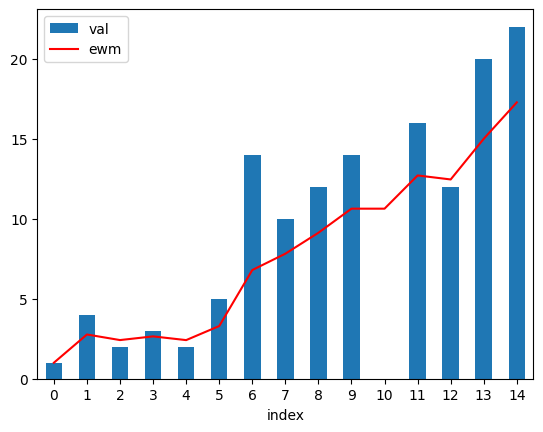

In [105]:
import matplotlib.pyplot as plt

df2 = df.assign(ewm = df['val'].ewm(alpha = 0.3).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x ='index', y = 'ewm', color = 'red', ax=ax)
plt.show()

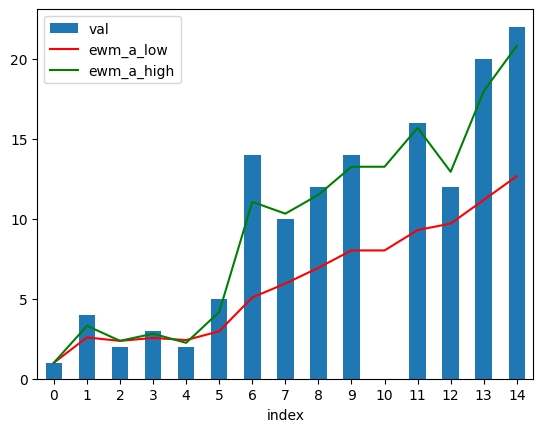

In [107]:
df2 = df.assign(ewm_a_low = df['val'].ewm(alpha = 0.1).mean())
df3 = df.assign(ewm_a_high = df['val'].ewm(alpha = 0.7).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x ='index', y = 'ewm_a_low', color = 'red', ax=ax)
ax3 = df3.plot(kind = 'line', x ='index', y = 'ewm_a_high', color = 'green', ax=ax)
plt.show()

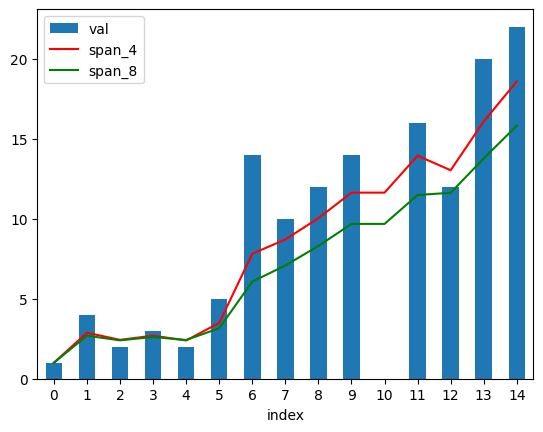

In [109]:
df2 = df.assign(span_4 = df['val'].ewm(span = 4).mean())
df3 = df.assign(span_8 = df['val'].ewm(span = 8).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x ='index', y = 'span_4', color = 'red', ax=ax)
ax3 = df3.plot(kind = 'line', x ='index', y = 'span_8', color = 'green', ax=ax)
plt.show()

com은 질량중심 감쇠법으로 평활계수를 계산.  

계산식은 a = 1/(1+com)으로 com이 커질수록 a가 작아짐

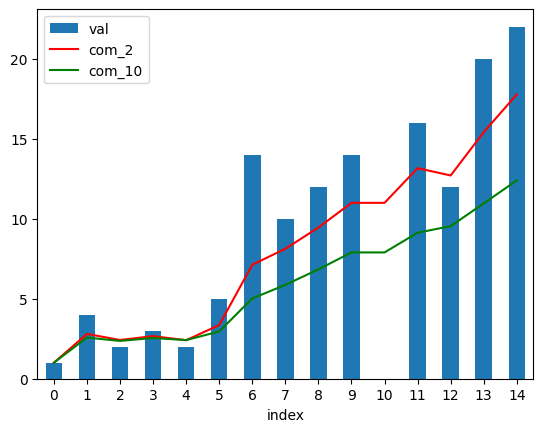

In [111]:
df2 = df.assign(com_2 = df['val'].ewm(com = 2).mean())
df3 = df.assign(com_10 = df['val'].ewm(com = 10).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x ='index', y = 'com_2', color = 'red', ax=ax)
ax3 = df3.plot(kind = 'line', x ='index', y = 'com_10', color = 'green', ax=ax)
plt.show()

halflife 질량중심 감쇠법으로 평활계수를 계산.  

계산식은 a = 1 - e^(-ln(2)/halflife)으로 halflife가 커질수록 a가 작아짐

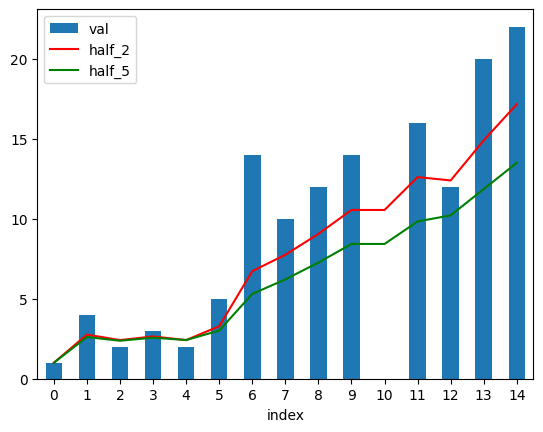

In [114]:
df2 = df.assign(half_2 = df['val'].ewm(halflife = 2).mean())
df3 = df.assign(half_5 = df['val'].ewm(halflife = 5).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x ='index', y = 'half_2', color = 'red', ax=ax)
ax3 = df3.plot(kind = 'line', x ='index', y = 'half_5', color = 'green', ax=ax)
plt.show()

adjust인수  
상대적 가중치의 불균형을 해소하기 위해 조정계수로 나눌지의 여부. 대체로 값이 많을수록 adjust를 하는 것이 유리

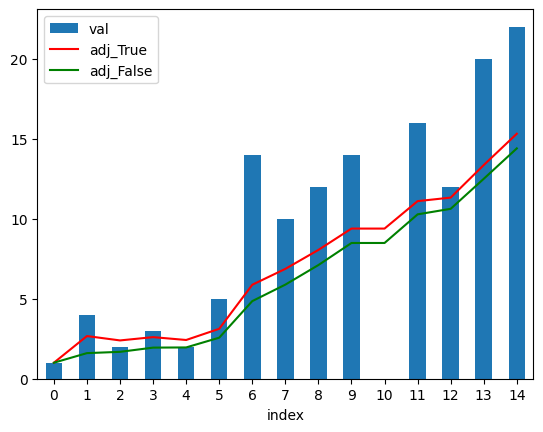

In [115]:
df2 = df.assign(adj_True = df['val'].ewm(alpha = 0.2, adjust = True).mean())
df3 = df.assign(adj_False = df['val'].ewm(alpha = 0.2, adjust = False).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x ='index', y = 'adj_True', color = 'red', ax=ax)
ax3 = df3.plot(kind = 'line', x ='index', y = 'adj_False', color = 'green', ax=ax)
plt.show()

ignore_na는 결측치가 존재할 경우 가중치를 어떻게 설정할지 정하는 인수

> [x0, None, x1] 일때,
이 경우 ignore_na = False 이면 절대위치를 기반으로 하며, x0와 x2의 가중치는 adjust = True 인 경우 (1-a)^2 와 1 / False 인 경우 (1-a)^2 와 a.

> [x0, None, x1] 일때,
이 경우 ignore_na = False 이면 절대위치를 기반으로 하며, x0와 x2의 가중치는 adjust = True 인 경우 (1-a) 와 1 / False 인 경우 (1-a) 와 a 입니다.

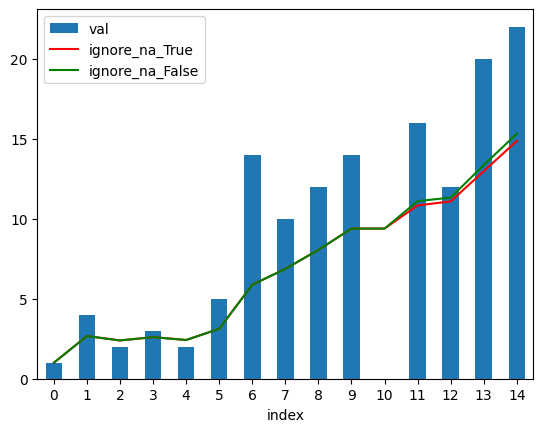

In [116]:
df2 = df.assign(ignore_na_True = df['val'].ewm(alpha = 0.2, ignore_na = True).mean())
df3 = df.assign(ignore_na_False = df['val'].ewm(alpha = 0.2, ignore_na = False).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x ='index', y = 'ignore_na_True', color = 'red', ax=ax)
ax3 = df3.plot(kind = 'line', x ='index', y = 'ignore_na_False', color = 'green', ax=ax)
plt.show()

method인수는 single인 경우 한줄씩, table인 경우 전체 테이블을 한번에 계산. 데이터가 많을수록 유리  

In [118]:
import numba
print(df[['val']].ewm(alpha = 0.2, method = 'table').mean(engine = 'numba'))

          val
0    1.000000
1    2.666667
2    2.393443
3    2.598916
4    2.420752
5    3.119872
6    5.873342
7    6.865055
8    8.051253
9    9.384118
10   9.384118
11  11.099676
12  11.320067
13  13.353744
14  15.312357
